# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math

In [2]:
gdp_le = pd.read_csv("../data/gdp_le.csv")
gdp_le.head()


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.
   

In [3]:
lr_gdp_le = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

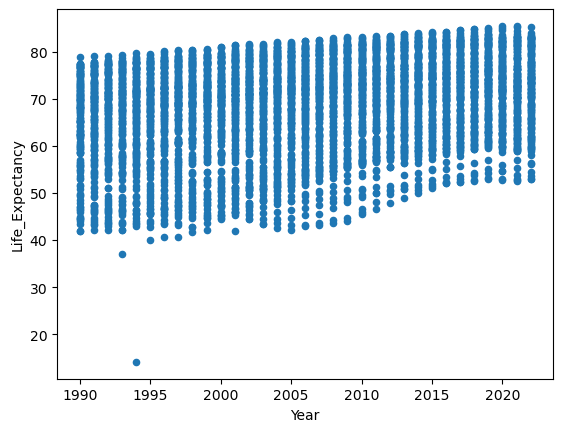

In [4]:
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy");

a. What coefficients do you get? Interpret the meaning of these coefficents.  

In [5]:
lr_gdp_le.params

Intercept   -468.138140
Year           0.267722
dtype: float64

mean(life_expectency) = -468.138140 + 0.267722(Year)
For every one year increase the average life expectency increases by 0.267722 year

b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?  
    

In [6]:
new_lr_gdp_le = smf.ols("Life_Expectancy ~ I(Year-1990)", data=gdp_le).fit()

In [7]:
new_lr_gdp_le.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

In 1990 the average life expectency is 64.628889. 
The ccoefficient 0.267722 represents for every one year increase the average life expectency increases by 0.267722 year

In [8]:
new_lr_gdp_le.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           8.13e-91
Time:                        21:44:53   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To check the statistical significance observe the P values.
p-value P>|t| is 0.000 and less than significance value(0.05) , It's statistically significant.

c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  
    

In [9]:
# average life expectency per year
gdp_le_agg = gdp_le.groupby('Year').agg({'Life_Expectancy':'mean'}).reset_index()
gdp_le_agg.head()

,Year,Life_Expectancy
0,1990,64.745253
1,1991,65.021276
2,1992,65.217845
3,1993,65.218031
4,1994,65.339539


In [10]:
#Estimate Avg life expectancy per year using least square regression
gdp_le_agg['model_estimate_LE'] = new_lr_gdp_le.predict(gdp_le_agg['Year'])
gdp_le_agg.head()

,Year,Life_Expectancy,model_estimate_LE
0,1990,64.745253,64.628889
1,1991,65.021276,64.896612
2,1992,65.217845,65.164334
3,1993,65.218031,65.432056
4,1994,65.339539,65.699778


In [11]:
gdp_le_agg['Residual'] = gdp_le_agg['Life_Expectancy']-gdp_le_agg['model_estimate_LE']
gdp_le_agg.head()

,Year,Life_Expectancy,model_estimate_LE,Residual
0,1990,64.745253,64.628889,0.116363
1,1991,65.021276,64.896612,0.124665
2,1992,65.217845,65.164334,0.053512
3,1993,65.218031,65.432056,-0.214025
4,1994,65.339539,65.699778,-0.360239


d. Plot the actual values against your model's estimates for the mean life expectancy.  
    

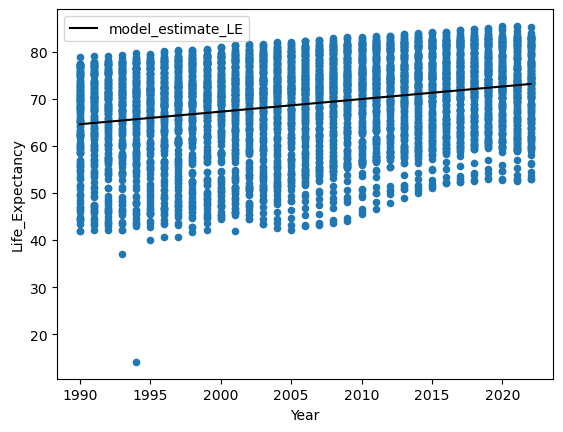

In [12]:
fig, ax = plt.subplots()
gdp_le.plot(kind = "scatter", x = 'Year', y = 'Life_Expectancy', ax=ax)
gdp_le_agg.plot(kind = "line", x = 'Year', y = 'model_estimate_LE',color = "black",ax=ax);


e. Inspect the R-squared value for the model. does it make sense, given the plot?  

In [13]:
new_lr_gdp_le.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           8.13e-91
Time:                        21:44:53   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value for the model is 0.072, it is very low. In the models plot it shows there is very less variability in life expectancy values. It makes sense.

2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  
    

In [14]:
gdp_le_2021 = gdp_le[gdp_le['Year']==2021]
gdp_le_2021.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497


In [15]:
lr_gdp_le_2021 = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le_2021).fit()

a. What coefficients do you get? Interpret the meaning of those coefficients.  
    

In [16]:
lr_gdp_le_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

For every 1 dollar increase in  GDP_Per_Capita, the life expectency increases by 0.000257.

b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?  
    

In [17]:
lr_gdp_le_2021K = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data = gdp_le_2021).fit()

In [18]:
lr_gdp_le_2021K.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           6.81e-32
Time:                        21:44:53   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept is same. 
For every 1000$ increase in GDP per Capita, the life expectency increases by 0.256892

c. Are the coefficients statistically significant?  
    

The p-value is less than 0.05 , so the coefficients are statistically significant.

d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000?
    

In [19]:
# mean life expectancy for a Country whose gdp per capita is 50,000
life_expectancy= 65.9499+0.2569 * 50,000
life_expectancy

(78.7949, 0)

In [20]:
# mean life expectancy for a Country whose gdp per capita is 100,000
65.9499+0.2569 * 100,000

(91.6399, 0)

*Mean life expectancy for a country whose gdp per capita is $50,000 around 78.80 years
*Mean life expectancy for a country whose gdp per capita is $100,000 around 91.64 years

e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

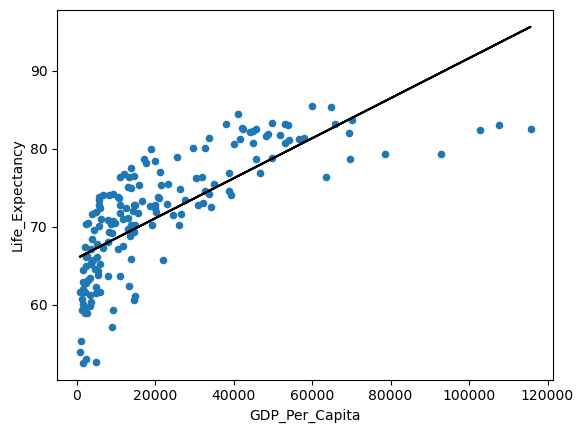

In [28]:
gdp_le_2021.plot(kind = "scatter", x = 'GDP_Per_Capita', y = 'Life_Expectancy')
plt.plot(gdp_le_2021['GDP_Per_Capita'],lr_gdp_le_2021.fittedvalues,color = 'black');

* For actual plot looks positively curved. For lower GDP_Per_Capita the life expectancy increased when it goes to higher GDP Per Capita it is kind of flattened.
* The linear model line looks positive upward line.

3. Now, fit a model for life expectancy based on the log of gdp per capita.  
    

In [32]:
gdp_le_2021['log_GDP'] = np.log(gdp_le_2021['GDP_Per_Capita'])
gdp_le_2021['log_GDP']

/var/folders/n1/v3s1h2t95hb_nmn96mg49sbm0000gn/T/ipykernel_20540/18461891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['log_GDP'] = np.log(gdp_le_2021['GDP_Per_Capita'])


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_GDP
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
21,Albania,2021,14595.944386,Europe,76.463,9.588499
54,Algeria,2021,11029.138782,Africa,76.377,9.308296
87,Angola,2021,5911.835657,Africa,61.643,8.684712
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,9.898469
...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,8.961943
5377,Vanuatu,2021,2800.493866,Oceania,70.449,7.937551
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,8.637825
5439,Zambia,2021,3236.788981,Africa,61.223,8.082337


In [34]:
lr_log_gdp_le_2021 = smf.ols('Life_Expectancy ~ log_GDP', data = gdp_le_2021).fit()

a. Inspect the coefficients for this model. Are they statistically significant?
    

In [35]:
lr_log_gdp_le_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           1.06e-48
Time:                        22:14:21   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9470      2.547      7.438      0.000      13.919      23.975
log_GDP        5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* For every 10 times increase in GDP per Capita the life expectency increases by around 5.59 years.
* The p-value is less than 0.05 , so they are statistically significant.

b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000?
    

In [53]:
# the average life expectancy for countries with a gdp per capita of 50,000
log_life_expectancy = 18.9470	+ 5.5890 * math.log(50000)
log_life_expectancy

79.41874083156908

In [52]:
#the average life expectancy for countries with a gdp per capita of 100,000
18.9470	+ 5.5890 * math.log(100000)

83.29274042371861

c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

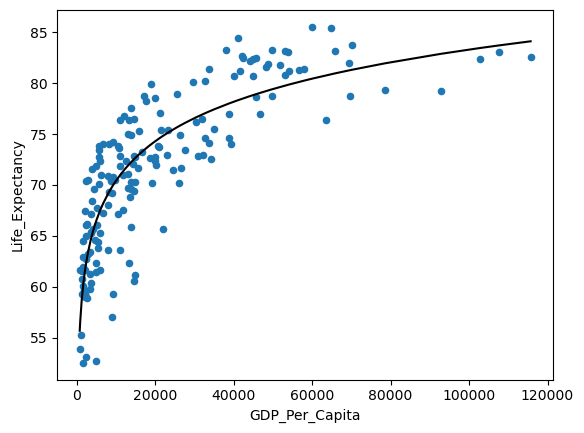

In [101]:
gdp_le_2021_sorted = gdp_le_2021.sort_values(by='GDP_Per_Capita')
gdp_le_2021_sorted.plot(kind = "scatter", x = 'GDP_Per_Capita', y = 'Life_Expectancy')
plt.plot(gdp_le_2021_sorted['GDP_Per_Capita'],lr_log_gdp_le_2021.fittedvalues.loc[gdp_le_2021_sorted.index],color = 'black');


In [100]:
lr_log_gdp_le_2021.fittedvalues.loc[gdp_le_2021_sorted.index]

840     55.672248
1004    56.563419
4489    58.270804
3618    58.510637
3368    58.696805
          ...    
581     81.944945
4082    82.879006
2285    83.446423
4364    83.709593
2857    84.107121
Length: 173, dtype: float64

4. Finally, return to the full dataset. 
    

a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.
    

In [71]:
gdp_le['log_GDP'] = np.log(gdp_le['GDP_Per_Capita'])


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_GDP
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
1,Afghanistan,2020,1968.341002,Asia,62.575,7.584946
2,Afghanistan,2019,2079.921861,Asia,63.565,7.640086
3,Afghanistan,2018,2060.698973,Asia,63.081,7.630801
4,Afghanistan,2017,2096.093111,Asia,63.016,7.647830
...,...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588,7.889874
5500,Zimbabwe,1993,2458.783255,Africa,54.426,7.807422
5501,Zimbabwe,1992,2468.278257,Africa,56.435,7.811276
5502,Zimbabwe,1991,2781.787843,Africa,58.091,7.930849


In [72]:
lr_log_gdp_le = smf.ols('Life_Expectancy ~ log_GDP', data = gdp_le).fit()

In [73]:
lr_log_gdp_le.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:11:24   Log-Likelihood:                -16834.
No. Observations:                5504   AIC:                         3.367e+04
Df Residuals:                    5502   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1941      0.532     17.297      0.000       8.152      10.236
log_GDP        6.5311      0.058    113.506      0.000       6.418       6.644
==============================================================================
Omnibus:                     1066.762   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.301
Skew:                          -1.108   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

In [75]:
lr_year_log_gdp_le = smf.ols('Life_Expectancy ~ log_GDP + Year', data = gdp_le).fit()

In [76]:
lr_year_log_gdp_le.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     7014.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:12:51   Log-Likelihood:                -16668.
No. Observations:                5504   AIC:                         3.334e+04
Df Residuals:                    5501   BIC:                         3.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.0674     14.490    -17.879      0.000    -287.474    -230.661
log_GDP        6.3599      0.057    112.387      0.000       6.249       6.471
Year           0.1345      0.007     18.525      0.000       0.120       0.149
==============================================================================
Omnibus:                     1096.440   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2582.760
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                       5.506   Cond. No.                     4.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* For every 1 year increase the life expectancy increases by 0.1345
* After adding Year variable to the modelit appears to be the intercept has drastically changed.

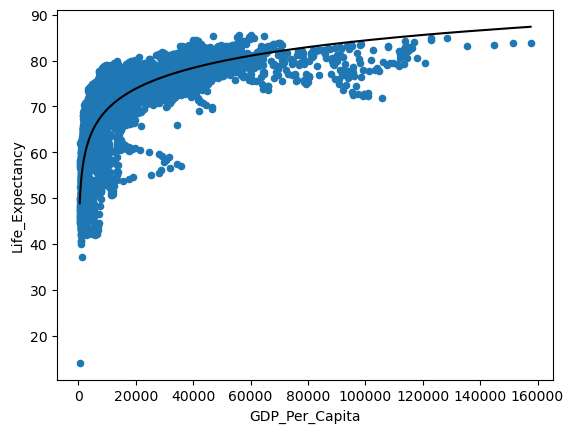

In [103]:
gdp_le_sorted = gdp_le.sort_values(by='GDP_Per_Capita')
gdp_le_sorted.plot(kind = "scatter", x = 'GDP_Per_Capita', y = 'Life_Expectancy')
plt.plot(gdp_le_sorted['GDP_Per_Capita'],lr_log_gdp_le.fittedvalues.loc[gdp_le_sorted.index],color = 'black');